In [1]:

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from math import sqrt
from scipy.io import loadmat
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model, Model
from keras.layers import Dense, Activation, Dropout, Input, LSTM, Reshape, Lambda, RepeatVector
from keras.initializers import glorot_uniform
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras import backend as K
from keras.models import Sequential
import matplotlib.pyplot as plt
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler



Using TensorFlow backend.


In [17]:
dataq=pd.read_excel('C:/Users/bard/Desktop/BP_data_1.xlsx')
dataq=dataq.dropna()
y=dataq['week_return']
X=dataq.iloc[:,3:]
X_train=X.iloc[:200]
X_test=X.iloc[200:]
y_train=y.iloc[:200]
y_test=y.iloc[200:]
minMax1 = MinMaxScaler() 
X_train = minMax1.fit_transform(X_train,(-1,1)) 
X_test = minMax1.fit_transform(X_test,(-1,1)) 
#建立模型
def create_model():
    model = Sequential()
    #输入数据的shape为(n_samples, timestamps, features)
    #隐藏层设置为50, input_shape元组第二个参数1意指features为1
    model.add(Dense(units=10,activation='relu',input_shape=(7,)))
    #后接全连接层，直接输出单个值，故units为1
    model.add(Dense(units=10))
    model.add(Dense(units=1))
    model.add(Activation('linear'))#选用线性激活函数
    model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])#损失函数为平均均方误差，优化器为Adam，学习率为0.01
    return model
model=create_model()
model.summary()
history=model.fit(X_train,y_train,epochs=30,batch_size=1,validation_data=(X_test,y_test))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                80        
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________
Train on 200 samples, validate on 58 samples
Epoch 1/30
200/200 [==============================] - 0s 1ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 2/30
200/200 [==============================] - 0s 845us/step - loss: 0

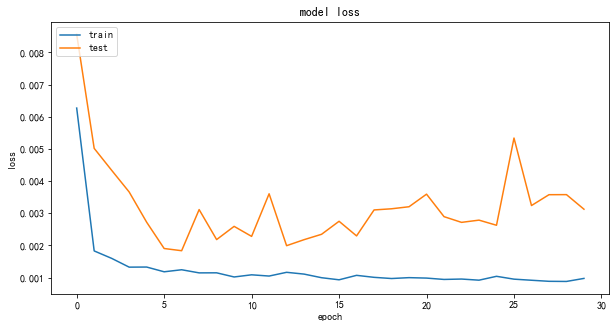

In [18]:
# history for loss
plt.figure(figsize = (10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
import keras.backend as K


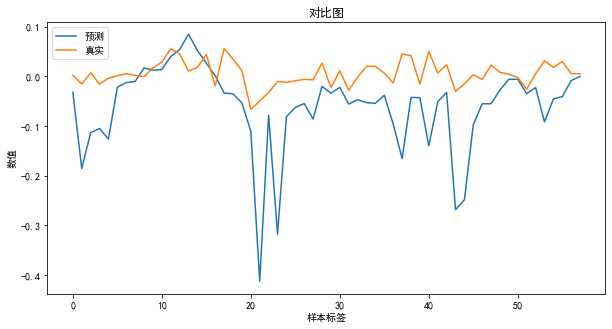

In [16]:
'''from keras.callbacks import LearningRateScheduler
 
def scheduler(epoch):
    # 每隔100个epoch，学习率减小为原来的1/10
    if epoch % 100 == 0 and epoch != 0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr * 0.1)
        print("lr changed to {}".format(lr * 0.1))
    return K.get_value(model.optimizer.lr)
 
reduce_lr = LearningRateScheduler(scheduler)
model.fit(X_train, y_train, batch_size=32, epochs=3000, callbacks=[reduce_lr])'''
# history for loss
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
predicts = model.predict(X_test)
plt.figure(figsize = (10,5))
plt.plot(list(predicts ))
plt.plot(list(y_test))
plt.title('对比图')
plt.ylabel('数值')
plt.xlabel('样本标签')
plt.legend(['预测', '真实'], loc='upper left')
plt.show()


In [19]:
predicts

array([[-3.21811810e-02],
       [-1.85432807e-01],
       [-1.13568567e-01],
       [-1.05021417e-01],
       [-1.26563594e-01],
       [-2.20907331e-02],
       [-1.26250964e-02],
       [-1.04539022e-02],
       [ 1.67234540e-02],
       [ 1.21748718e-02],
       [ 1.35503495e-02],
       [ 3.98520902e-02],
       [ 5.37278242e-02],
       [ 8.45941082e-02],
       [ 5.17533123e-02],
       [ 2.62252539e-02],
       [ 1.25909317e-03],
       [-3.38028520e-02],
       [-3.53298634e-02],
       [-5.36800437e-02],
       [-1.10728055e-01],
       [-4.12300587e-01],
       [-7.83433318e-02],
       [-3.17576826e-01],
       [-8.13601911e-02],
       [-6.26551956e-02],
       [-5.48766926e-02],
       [-8.60528052e-02],
       [-2.02880390e-02],
       [-3.40014920e-02],
       [-2.23688334e-02],
       [-5.59499338e-02],
       [-4.68755625e-02],
       [-5.30748293e-02],
       [-5.42562790e-02],
       [-3.81043553e-02],
       [-9.61837023e-02],
       [-1.65470839e-01],
       [-4.2